# Empirical constraints: an overview

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_helpers import *
import seaborn as sns

In [2]:
dtypes={"Label":str, "rho0":np.float64, "E/aA": np.float64}
data_skyrme=pd.read_csv("data/satpoints_skyrme.csv", comment="#", dtype=dtypes)
data_rmf=pd.read_csv("data/satpoints_rmf.csv", comment="#", dtype=dtypes)
data_FC1=pd.read_csv("data/forChristan_samples1.csv",comment="#", names=["rho0","E/A"])
data_FC2=pd.read_csv("data/forChristan_samples2.csv",comment="#", names=["rho0","E/A"])
data_FC3=pd.read_csv("data/forChristan_samples3.csv",comment="#", names=["rho0","E/A"])

def import_fwf_data(filepath, column_name):
    data = pd.read_fwf(filepath, skiprows=7, comment='#', usecols=column_name)
    return data.rename(columns={column_name[0]:"rho0", column_name[1]:"E/A"})
                       
data_RMF012_1 = import_fwf_data("saturation/RMF012/CovEllipse.out", ["A39","B39"])
data_RMF012_2 = import_fwf_data("saturation/RMF012/CovEllipse.out", ["A95","B95"])
data_RMF016_1 = import_fwf_data("saturation/RMF016/CovEllipse.out", ["A39","B39"])
data_RMF016_2 = import_fwf_data("saturation/RMF016/CovEllipse.out", ["A95","B95"])
data_RMF022_1 = import_fwf_data("saturation/RMF022/CovEllipse.out", ["A39","B39"])
data_RMF022_2 = import_fwf_data("saturation/RMF022/CovEllipse.out", ["A95","B95"])
data_RMF028_1 = import_fwf_data("saturation/RMF028/CovEllipse.out", ["A39","B39"])
data_RMF028_2 = import_fwf_data("saturation/RMF028/CovEllipse.out", ["A95","B95"])
data_RMF032_1 = import_fwf_data("saturation/RMF032/CovEllipse.out", ["A39","B39"])
data_RMF032_2 = import_fwf_data("saturation/RMF032/CovEllipse.out", ["A95","B95"])

def insert_type(typename, data):
    data["type"]=typename
    return data

insert_type("Skyrme", data_skyrme)
insert_type("RMF", data_rmf)


def insert_type_and_label(typename, labelname, data):
    data["type"]=typename
    data["Label"]=labelname
    return data

insert_type_and_label("Schunck", "UNDEF", data_FC1)
insert_type_and_label("Schunck", "UNDEF", data_FC2)
insert_type_and_label("Schunck", "UNDEF", data_FC3)
insert_type_and_label("RMF012", "temp", data_RMF012_1)
insert_type_and_label("RMF012", "temp", data_RMF012_2)
insert_type_and_label("RMF016", "temp", data_RMF016_1)
insert_type_and_label("RMF016", "temp", data_RMF016_2)
insert_type_and_label("RMF022", "temp", data_RMF022_1)
insert_type_and_label("RMF022", "temp", data_RMF022_2)
insert_type_and_label("RMF028", "temp", data_RMF028_1)
insert_type_and_label("RMF028", "temp", data_RMF028_2)
insert_type_and_label("RMF032", "temp", data_RMF032_1)
insert_type_and_label("RMF032", "temp", data_RMF032_2)



data=pd.concat([data_skyrme, data_rmf, data_FC1, data_FC2, data_FC3, data_RMF012_1, data_RMF012_2, data_RMF016_1, data_RMF016_2, data_RMF022_1, data_RMF022_2, data_RMF028_1, data_RMF028_2, data_RMF032_1, data_RMF032_2])

data.tail(n=10000)

,Label,rho0,E/A,type
1010,UNDEF,0.156448,-15.759098,Schunck
1011,UNDEF,0.155968,-15.777481,Schunck
1012,UNDEF,0.155016,-15.728392,Schunck
1013,UNDEF,0.155568,-15.787707,Schunck
1014,UNDEF,0.155624,-15.750071,Schunck
...,...,...,...,...
496,temp,0.150937,-16.348962,RMF032
497,temp,0.150931,-16.348309,RMF032
498,temp,0.150925,-16.347656,RMF032
499,temp,0.150919,-16.347002,RMF032


## Plot the data

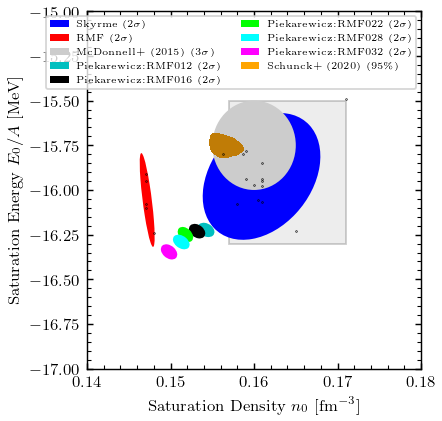

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8.6*cm, 8.2*cm), constrained_layout=True)

legend_elements=[]
for imodel,model in enumerate(("Skyrme", "RMF",)):
    masked_data=data[data["type"]==model]
    color=colorset[imodel]
    confidence_ellipse(masked_data["rho0"], masked_data["E/A"], 
                       ax, n_std=2.0, facecolor=color, show_scatter=True)
    legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor=color, label=f"{model} (2$\\sigma$)"))
    

plot_empirical_saturation(ax=ax, zorder=-3)

color=facecolor="0.8"

confidence_ellipse_mean_cov([np.mean([0.155,0.165]),np.mean([-16, -15.5])], np.diag([0.005,0.25])**2, 
                            ax=ax, n_std=1, facecolor="0.8")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor=color, label=f"McDonnell+ (2015) (3$\\sigma$)"))
# 0.155 ≤ ρc ≤ 0.165 (fm−3 ); −16.0 ≤ E NM /A ≤ −15.5 (MeV);

A = 0.00050130*0.01999912*-0.29158285
B = 0.00048769*0.02038334*-0.308589947
C = 0.00046273*0.02118417*-0.375325077
D = 0.00049995*0.02041218*-0.441671888
E = 0.00049060*0.02125960*-0.411680612
confidence_ellipse_mean_cov(np.array([0.15425317,-16.22350914]), np.array([[0.00050130**2, A],[A, 0.01999912**2]]),
                           ax=ax, n_std=2, facecolor="c")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="c", label=f"Piekarewicz:RMF012 (2$\\sigma$)"))

confidence_ellipse_mean_cov(np.array([0.15317940, -16.23045213]), np.array([[0.00048769**2, B],[B, 0.02038334**2]]),
                           ax=ax, n_std=2, facecolor="k")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="k", label=f"Piekarewicz:RMF016 (2$\\sigma$)"))

confidence_ellipse_mean_cov(np.array([0.15178061, -16.24908255]), np.array([[0.00046273**2, C],[C, 0.02118417**2]]),
                           ax=ax, n_std=2, facecolor="lime")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="lime", label=f"Piekarewicz:RMF022 (2$\\sigma$)"))

confidence_ellipse_mean_cov(np.array([0.15128289, -16.29113016]), np.array([[0.00049995**2, C],[C, 0.02041218**2]]),
                           ax=ax, n_std=2, facecolor="aqua")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="aqua", label=f"Piekarewicz:RMF028 (2$\\sigma$)"))

confidence_ellipse_mean_cov(np.array([0.14981891, -16.34635837]), np.array([[0.00049060**2, C],[C, 0.02125960**2]]),
                           ax=ax, n_std=2, facecolor="magenta")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="magenta", label=f"Piekarewicz:RMF032 (2$\\sigma$)"))


def plotkde(filename):
    data1 = np.loadtxt(filename, delimiter=',', skiprows=1)
    sns.kdeplot(x=data1[:,0], y=data1[:,1], fill=True, levels=[.05,1], color="orange")
    legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="orange", label=f"Schunck+ (2020) (95\%)"))   
     
plotkde("data/forChristan_samples1.csv")
#plotkde("data/forChristan_samples2.csv")
#plotkde("data/forChristan_samples3.csv")

ax.legend(handles=legend_elements, loc='best', fontsize='xx-small', ncol=2)
#ax.axvspan(.155,.165,alpha=.2)
ax.set_xlim(0.14, 0.18)
ax.set_ylim(-17, -15.)
ax.set_xlabel('Saturation Density $n_0$ [fm$^{-3}$]')
ax.set_ylabel('Saturation Energy $E_0/A$ [MeV]')
fig.savefig("saturation.pdf")